In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np


In [2]:
#Read the data
data = pd.read_csv(r"C:\Users\Mahesh\Desktop\data science\Asssignment\Multi Linear Regression\50_Startups.csv")
data.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## EDA

In [3]:
!pip install pandas_profiling
!pip install sweetviz

In [4]:
import pandas_profiling as pp
import sweetviz as sv

In [5]:
#data types
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
#Count of duplicated rows
data[data.duplicated()].shape

(0, 5)

In [8]:
#rename the R&D Spend column
data = data.rename({'R&D Spend': 'RD_Spend'}, axis=1)


In [9]:
data = data.rename({'Marketing Spend': 'Marketing_Spend'}, axis=1)

In [10]:
#Creating dummy variable for Weather column
data=pd.get_dummies(data,columns=['State'])

In [11]:
data

,RD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [12]:
data = data.rename({'State_New York': 'State_NY'}, axis=1)

In [13]:
data.corr()

,RD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_NY
RD_Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_NY,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


### Scatterplot between variables along with histograms

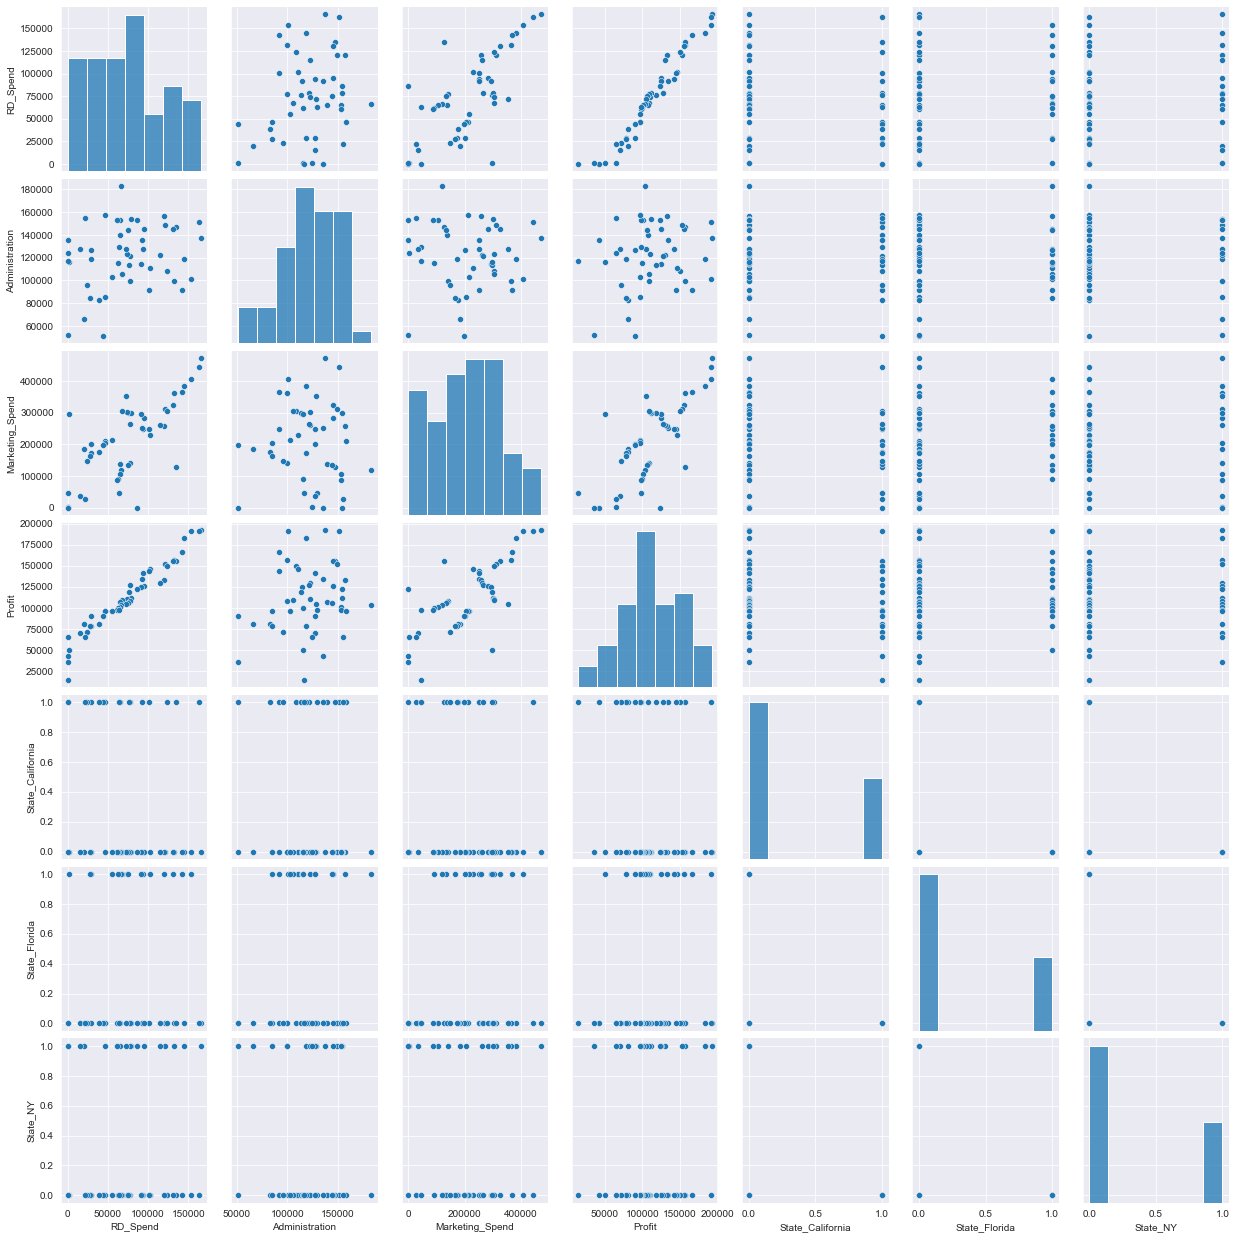

In [14]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(data)

## Preparing a Model

In [15]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~RD_Spend+Administration+Marketing_Spend+State_California+State_Florida+State_NY',data=data).fit()

In [16]:
#Coefficients
model.params

Intercept           37633.233317
RD_Spend                0.806023
Administration         -0.027004
Marketing_Spend         0.026980
State_California    12492.110514
State_Florida       12690.899307
State_NY            12450.223495
dtype: float64

In [17]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept            7.417409
RD_Spend            17.368580
Administration      -0.517012
Marketing_Spend      1.573889
State_California     5.099242
State_Florida        4.654306
State_NY             5.007401
dtype: float64 
 Intercept           2.807645e-09
RD_Spend            2.578772e-21
Administration      6.077373e-01
Marketing_Spend     1.226769e-01
State_California    6.942555e-06
State_Florida       2.992503e-05
State_NY            9.409010e-06
dtype: float64


In [18]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507524843355148, 0.945156175737278)

In [19]:
#New data for prediction
new_data=pd.DataFrame({'RD_Spend':16684,"Administration":81391.77,"Marketing_Spend":369462,"State_California":0,"State_Florida":0,"State_NY":1},index=[1])

In [20]:
model.predict(new_data)

1    71301.250486
dtype: float64